## **ODE - Drag Models**
---

>## Parallel Motion, Linear Drag Model
$$
m*v'(t) = -Kv(t),\ v(t_0) = v_0 \\
{}\\
v(t) = v_0 * e^{ -\frac{\kappa}{m} \cdot (t-t_0)} \\
$$
- **Scenario**: What should the value of κ be so that in 3,000 m, the speed of the space shuttle is reduced to 10% of its landing speed of 120 m/s (over 400 km/hr), given that it weighs 78, 000 kg? The assumption is that friction brakes could take over at that point.
$$$$
- **K**: $\frac{0.9*v0*m}{3000} \approx 2808$
$$$$
- **Find** $e^{ -\frac{\kappa}{m} \cdot Tf}  = 0.1$ ==> `Tf = -(m/kappa)*log(0.1)`

- **Key Takeaways**
    - Initialize parameters using struct: `params = Params(m, kappa, g)`
    - Define ODE 
    - Set initial condition (vector) and time span
    - Set the ODE problem: `ODEProblem{false}(parallel_linear, v0, tspan, params)`
    - Solve the ODE problem: `solve(prob, Tsit5())`

Packages used:
<span style="color:yellow; background-color:green">DifferentialEquations, Plots</span>


In [28]:
using DifferentialEquations, Plots
include("src/drag_model_library.jl")

vertical_model (generic function with 1 method)

In [16]:
gr()

# Define Linear Drag Model
struct Params
    m::Float64
    kappa::Float64
    g::Float64
end

# Initialize parameters
m = 78e3
g = 9.81
v0 = 120
kappa = (0.9*v0*m)/3000; @show kappa

params = Params(m, kappa, g)

# Define the ODE function
function parallel_linear(v, params, t)
    dv = -(params.kappa / params.m) * v 
    return dv
end

# Set initial condition as a vector
v0 = [v0] 

# Set time span
tspan = (0.0, 100.0)

# Create the ODE problem
prob = ODEProblem{false}(parallel_linear, v0, tspan, params)

# Solve the ODE problem
sol = solve(prob, Tsit5())
println("done")

kappa = 2808.0
done


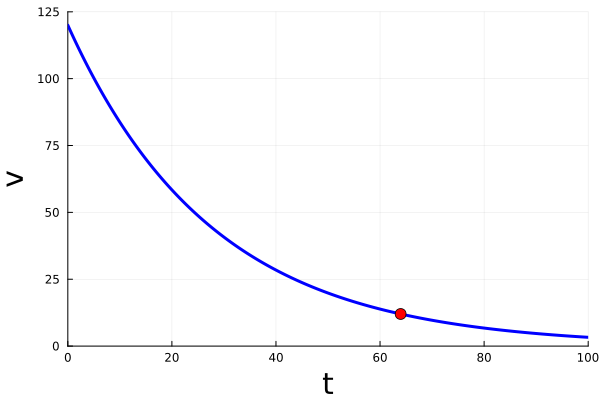

Tf = 63.960697027612376


In [17]:
# plot the solution
p1 = plot(sol, lw=3, guidefont = 20,  xlabel="t", ylabel="v", legend=false, color=:blue)
ylims!(p1, (0, 125))

# e^{ -\frac{\kappa}{m} \cdot Tf}  = 0.1 <==> Tf = -(m/kappa)*log(0.1)
Tf = -(m/kappa)*log(0.1); @show Tf
p1 = scatter!(p1, [Tf], [0.1*v0], color=:red, markersize=6)

#png(p1, "SpaceShuttleLinearDragModel")
display(p1)

>## Parallel Motion, Nonlinear Drag Model
$$
m*v'(t) = -Kv^2(t),\ v(t_0) = v_0\\
{}\\
v(t) = \frac{v_0}{1+v_0 \cdot \frac{\kappa}{m} \cdot (t-t_0)}
$$
- **Scenario**: With this nonlinear model of drag, what should the value of $\kappa$ be so that in 3,000 m, the speed of the space shuttle is reduced to 10% of its landing speed of 120 m/s (over 400 km/hr), given that it weighs 78, 000 kg? The assumption, again, is that friction brakes could take over at that point.
$$$$
- **K**: $\frac{m}{3000} \cdot log(10) \approx 59.8$
$$$$
- **Find** $\frac{1}{1+v_0 \cdot \frac{\kappa}{m} \cdot Tf}  = 0.1$ ==> `Tf = 9*m/(kappa*v0[1])`

In [29]:
# Similar process, check drag_model_library.jl for details
Tf, sol = parallel_model("nonlinear")
println("done")

kappa = 59.867212417845195
done


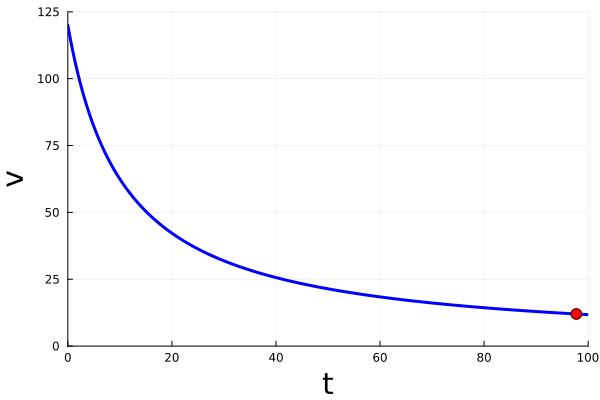

Tf = 97.71625842823164


In [30]:
# plot the solution
p1 = plot(sol, lw=3, guidefont = 20,  xlabel="t", ylabel="v", legend=false, color=:blue)
ylims!(p1, (0, 125))

# e^{ -\frac{\kappa}{m} \cdot Tf}  = 0.1 <==> Tf = 9*m/(kappa*v0[1])
@show Tf
p1 = scatter!(p1, [Tf], [0.1*v0], color=:red, markersize=6)
ylims!(p1, (0, 125))

#png(p1, "SpaceShuttleLinearDragModel")
display(p1)

>## Vertical Motion, Linear Drag Model
$$
m*v'(t) = -Kv(t) - mg,\ v(t_0) = v_0\\
{}\\
v(t) = v_0 e^{-\frac{\kappa}{m}(t - t_0)} - \frac{mg}{\kappa} \left( 1 - e^{-\frac{\kappa}{m}(t - t_0)} \right)
$$
- **Scenario**: If a 75 kg parachutist wants to land with a speed of −2m/s, they need a parachute that provides a drag coefficient of ?
$$$$
- **V_terminal**: $-\frac{m g}{\kappa}$
$$$$
- **Find** $\kappa$ ==> `kappa = -m*g/vTerminal;`

In [32]:
# Similar process, check drag_model_library.jl for details
sol = vertical_model("linear")
println("done")

kappa = 367.875
done


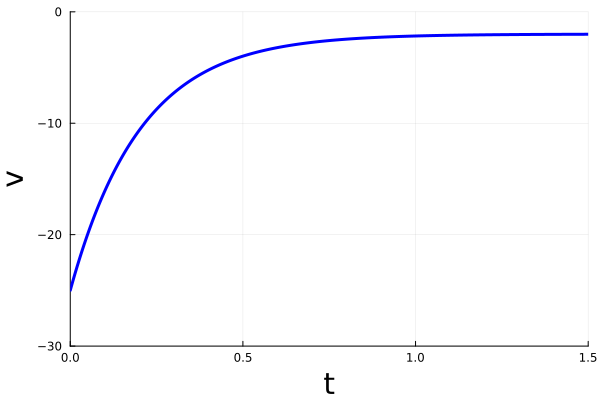

In [33]:
# plot the solution
p1 = plot(sol, lw=3, guidefont = 20,  xlabel="t", ylabel="v", legend=false, color=:blue)
ylims!(p1, (-30, 0))

#png(p1, "ParachutistLinearDragModel")
display(p1)

>## Vertical Motion, Nonlinear Drag Model
$$
m*v'(t) = -Kv^2(t) - mg,\ v(t_0) = v_0\\
{}\\
v(t) = \text{No closed form}
$$
- **Scenario**: If a 75 kg parachutist wants to land with a speed of −2m/s, they need a parachute that provides a drag coefficient of ?
$$$$
- **V_terminal**: $\sqrt{\frac{-m g}{\kappa}}$
$$$$
- **Find** $\kappa$ ==> `kappa = -m*g/vTerminal^2;`

In [34]:
# Similar process, check drag_model_library.jl for details
sol = vertical_model("nonlinear")
println("done")

kappa = -183.9375
done


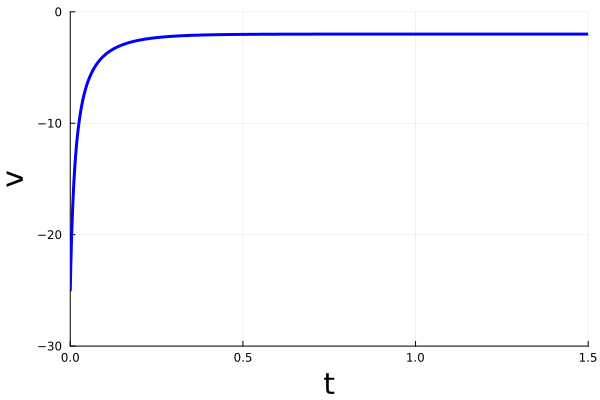

In [35]:
# plot the solution
p1 = plot(sol, lw=3, guidefont = 20,  xlabel="t", ylabel="v", legend=false, color=:blue)
ylims!(p1, (-30, 0))

#png(p1, "ParachutistNonlinearDragModel")
display(p1)